In [17]:
df = pd.read_csv("Melbourne_Housing_Full.csv")
df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105.0,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225.0,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152.0,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


import warnings 
warnings.filterwarnings ("ignore")

In [18]:
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [19]:
df.tail()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105.0,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225.0,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152.0,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0
34856,Westmeadows,42 Pascoe St,4,h,S,Barry,30/09/2017,16.5,3049.0,4.0,...,813.0,140.0,1960.0,Hume City Council,-37.67631,144.89409,Northern Metropolitan,2474.0,Attached Garage,791000.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

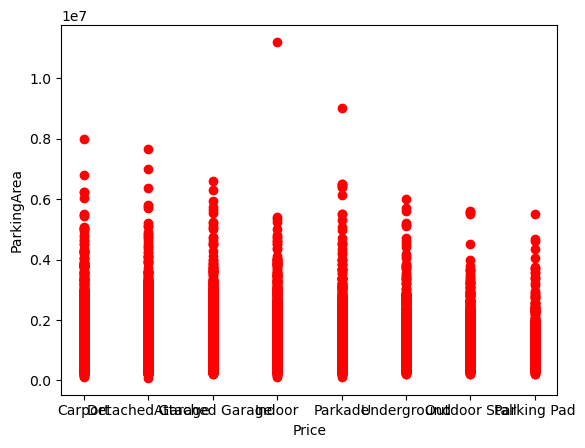

In [21]:
%matplotlib inline
plt.xlabel('Price')
plt.ylabel('ParkingArea')
plt.scatter(df.ParkingArea,df.Price,color='Red')

#Data Gathering

In [22]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [23]:
df['Distance'].unique()

array([ 2.5, 13.5,  3.3,  6.4, 13.8, 11.1,  6.3,  5.9, 11. , 12.2, 10.5,
        6.6,  9.7,  9.2, 13. , 13.9, 13.1, 10.8, 11.2, 10.7,  5.2, 11.8,
       11.7,  7.8,  9. ,  3.2, 11.4,  8.9,  8.1,  9.3, 13.6,  3.4,  1.6,
       10.3,  8.5,  7.7,  8. ,  9.4,  5.8,  3.5,  4.4, 12.1, 13.7, 14.5,
        4.6,  7.9, 15. , 12.8,  4.2,  5.6,  7.5,  6.2,  7.4,  8.7,  2.8,
        4.1,  6.9, 14.6,  8.4,  2.3,  5.5, 11.5, 14.7,  2.6,  9.9,  3.8,
        4.5,  8.8,  2.1,  1.2,  6.1, 12.6, 13.3,  6.5, 14.9,  1.9,  5.1,
        7. ,  9.1,  9.5,  1.8,  1.5,  9.8, 12.4, 10.6,  8.2, 10.4, 14. ,
       12.5,  5.3, 12.7, 10.9,  3. ,  5.7, 15.5,  4.3, 10.2, 16.5, 23.2,
       17.3, 35.2, 13.4, 25. , 16.1,  4. , 14.8, 10.1, 17.9, 17.5, 16.7,
        3.6, 43.4,  6.7, 20.6, 34.7, 23. , 24.7, 21.8, 22.2, 14.3, 25.9,
        1.3, 27. , 18. ,  7.2, 36.9, 19.6, 28.8, 24.8, 15.4, 38. , 45.9,
       12.9,  7.3, 20.4, 32.3, 45.2, 21.3, 16. , 18.4, 12.3,  5.4, 25.2,
       16.3, 33.8, 31.7, 29.8, 20. , 17.2, 16.2, 21

In [24]:
df['Distance'].mean()

11.18492942391554

In [25]:
df['Distance'].fillna(df['Distance'].mean() , inplace=True)

In [26]:
df['Distance'].isnull().sum()

0

In [27]:
df['Postcode'].unique()

array([3067., 3042., 3206., 3078., 3018., 3025., 3143., 3032., 3147.,
       3034., 3183., 3103., 3104., 3204., 3165., 3128., 3019., 3186.,
       3187., 3056., 3055., 3105., 3125., 3124., 3126., 3054., 3163.,
       3162., 3161., 3148., 3068., 3058., 3066., 3108., 3084., 3185.,
       3184., 3040., 3041., 3065., 3031., 3011., 3146., 3046., 3043.,
       3188., 3122., 3081., 3166., 3079., 3021., 3033., 3101., 3102.,
       3144., 3012., 3145., 3000., 3127., 3039., 3189., 3015., 3051.,
       3070., 3167., 3052., 3044., 3207., 3181., 3072., 3073., 3121.,
       3205., 3141., 3006., 3182., 3020., 3107., 3071., 3142., 3087.,
       3003., 3016., 3085., 3013., 3057., 3061., 3053., 3002., 3060.,
       3123., 3047., 3083., 3008., 3028., 3022., 3049., 3153., 3193.,
       3806., 3130., 3155., 3088., 3023., 3151., 3192., 3169., 3168.,
       3978., 3064., 3977., 3136., 3175., 3089., 3172., 3109., 3111.,
       3754., 3196., 3095., 3782., 3076., 3177., 3156., 3131., 3199.,
       3200., 3437.,

In [28]:
df['Postcode'] = df['Postcode'].fillna(3073.0)

In [29]:
df['Postcode'].value_counts()

Postcode
3073.0    845
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3770.0      1
3428.0      1
3139.0      1
3786.0      1
3793.0      1
Name: count, Length: 211, dtype: int64

In [30]:
df['Postcode'].isnull().sum()

0

In [31]:
df['Propertycount'].unique()

array([ 4019.,  3464.,  3280.,  2211.,  5301.,  5132.,  4836.,  6567.,
        3052.,  2894.,  4502.,  2952.,  5682.,  7809.,  6795., 10969.,
        4605.,  3589., 10579.,  6938., 11918.,  7082.,  4480.,  5678.,
        8920.,  3265.,  3106.,  7822.,  2379.,  6923.,  5051.,  3582.,
        2954., 11204.,  3445.,  4553.,  9028.,  1651.,  4898.,  8989.,
        9264.,  1308.,  2970.,  5825.,  6244.,  3593.,  7570., 10412.,
        8870.,  1071.,  2606.,  5454.,  2356., 11308.,  2947.,  2674.,
        3145.,  5549.,  1202.,  5629.,  5263., 10331.,  2671.,   394.,
        3873.,  4675.,  8801.,  4918., 17496.,  2019.,  2079.,  6232.,
        2555.,  5498.,  2291.,  6821., 11364.,  2651.,  3692.,  2309.,
        7485.,  8648.,  7717., 14577., 21650., 14949.,  3540.,  2417.,
        5943., 14887.,  8400.,  1223., 13240.,  3284.,  3755.,  4217.,
        6763.,  5457.,  5420.,  7217.,  2698.,  2329.,  2230.,  6380.,
         802.,  4380.,  1369.,  6543.,  1543.,   790.,  5533.,   438.,
      

In [32]:
df['Propertycount'].unique()

array([ 4019.,  3464.,  3280.,  2211.,  5301.,  5132.,  4836.,  6567.,
        3052.,  2894.,  4502.,  2952.,  5682.,  7809.,  6795., 10969.,
        4605.,  3589., 10579.,  6938., 11918.,  7082.,  4480.,  5678.,
        8920.,  3265.,  3106.,  7822.,  2379.,  6923.,  5051.,  3582.,
        2954., 11204.,  3445.,  4553.,  9028.,  1651.,  4898.,  8989.,
        9264.,  1308.,  2970.,  5825.,  6244.,  3593.,  7570., 10412.,
        8870.,  1071.,  2606.,  5454.,  2356., 11308.,  2947.,  2674.,
        3145.,  5549.,  1202.,  5629.,  5263., 10331.,  2671.,   394.,
        3873.,  4675.,  8801.,  4918., 17496.,  2019.,  2079.,  6232.,
        2555.,  5498.,  2291.,  6821., 11364.,  2651.,  3692.,  2309.,
        7485.,  8648.,  7717., 14577., 21650., 14949.,  3540.,  2417.,
        5943., 14887.,  8400.,  1223., 13240.,  3284.,  3755.,  4217.,
        6763.,  5457.,  5420.,  7217.,  2698.,  2329.,  2230.,  6380.,
         802.,  4380.,  1369.,  6543.,  1543.,   790.,  5533.,   438.,
      

In [33]:
df['Propertycount'].unique()

array([ 4019.,  3464.,  3280.,  2211.,  5301.,  5132.,  4836.,  6567.,
        3052.,  2894.,  4502.,  2952.,  5682.,  7809.,  6795., 10969.,
        4605.,  3589., 10579.,  6938., 11918.,  7082.,  4480.,  5678.,
        8920.,  3265.,  3106.,  7822.,  2379.,  6923.,  5051.,  3582.,
        2954., 11204.,  3445.,  4553.,  9028.,  1651.,  4898.,  8989.,
        9264.,  1308.,  2970.,  5825.,  6244.,  3593.,  7570., 10412.,
        8870.,  1071.,  2606.,  5454.,  2356., 11308.,  2947.,  2674.,
        3145.,  5549.,  1202.,  5629.,  5263., 10331.,  2671.,   394.,
        3873.,  4675.,  8801.,  4918., 17496.,  2019.,  2079.,  6232.,
        2555.,  5498.,  2291.,  6821., 11364.,  2651.,  3692.,  2309.,
        7485.,  8648.,  7717., 14577., 21650., 14949.,  3540.,  2417.,
        5943., 14887.,  8400.,  1223., 13240.,  3284.,  3755.,  4217.,
        6763.,  5457.,  5420.,  7217.,  2698.,  2329.,  2230.,  6380.,
         802.,  4380.,  1369.,  6543.,  1543.,   790.,  5533.,   438.,
      

In [34]:
df['Propertycount'].mean()

7572.8883055029555

In [35]:
df['Propertycount'].fillna(df['Propertycount'].mean(), inplace=True)

In [36]:
df['Propertycount'].isnull().sum()

0

In [37]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        0
ParkingArea          0
Price             7610
dtype: int64

In [38]:
df['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Mitchell Shire Council', 'Moorabool Shire Council', nan],
      dtype=object)

In [39]:
df['CouncilArea'].value_counts()

CouncilArea
Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston Cit

In [40]:
df['CouncilArea']= df['CouncilArea'].fillna('Moorabool Shire Council')

In [41]:
df['CouncilArea'].isnull().sum()

0

In [42]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          0
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        0
ParkingArea          0
Price             7610
dtype: int64

In [43]:
df['Bedroom'].unique()

array([ 2.,  3.,  5., nan,  4.,  1.,  6.,  7.,  0., 20.,  8., 30.,  9.,
       12., 10., 16.])

In [44]:
df['Bedroom'].value_counts()

Bedroom
3.0     11881
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
20.0        1
30.0        1
12.0        1
16.0        1
Name: count, dtype: int64

In [45]:
df['Bedroom']=df['Bedroom'].fillna(3.0)

In [46]:
df['Bedroom'].astype(int)

0        2
1        3
2        2
3        2
4        3
        ..
34852    3
34853    4
34854    4
34855    3
34856    4
Name: Bedroom, Length: 34857, dtype: int32

In [47]:
df['Bedroom'].isnull().sum()

0

In [48]:
df['Bathroom'].unique()

array([ 1.,  2.,  3., nan,  4.,  5.,  0., 12.,  7.,  8.,  6.,  9.])

In [49]:
df['Bathroom'].value_counts()

Bathroom
1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: count, dtype: int64

In [50]:
df['Bathroom']=df['Bathroom'].fillna(1.0)

In [51]:
df['Bathroom'].value_counts()

Bathroom
1.0     21195
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: count, dtype: int64

In [52]:
df['Car'].unique()

array([ 1.,  0.,  4.,  2.,  6., nan,  3.,  7.,  5.,  9.,  8., 10., 12.,
       11., 26., 18.])

In [53]:
df['Car'].value_counts()

Car
2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
12.0        1
26.0        1
18.0        1
Name: count, dtype: int64

In [54]:
df['Car']=df['Car'].fillna(2.0)

In [55]:
df['Car'].astype(int)

0        1
1        1
2        0
3        0
4        1
        ..
34852    1
34853    2
34854    2
34855    1
34856    6
Name: Car, Length: 34857, dtype: int32

In [56]:
df['Landsize'].unique()

array([ 126.,  303.,  120., ..., 2193., 1357., 9833.])

In [57]:
df['Landsize'].value_counts()

Landsize
0.0        2437
650.0       204
697.0       123
585.0        97
700.0        86
           ... 
21600.0       1
1669.0        1
2335.0        1
1085.0        1
9833.0        1
Name: count, Length: 1684, dtype: int64

In [58]:
df['Landsize'].mean()

593.598993361392

In [59]:
df['Landsize'].fillna(df['Landsize'].mean(), inplace=True)

In [60]:
df['Landsize'].astype(int)

0        126
1        303
2        120
3        159
4        174
        ... 
34852    593
34853    593
34854    534
34855    544
34856    813
Name: Landsize, Length: 34857, dtype: int32

In [61]:
df['Landsize'].value_counts()

Landsize
593.598993     11810
0.000000        2437
650.000000       204
697.000000       123
585.000000        97
               ...  
35.000000          1
4735.000000        1
1389.000000        1
1569.000000        1
9833.000000        1
Name: count, Length: 1685, dtype: int64

In [62]:
df['BuildingArea'].unique()

array(['inf', '225', '82', '122', '263', '242', '108', '251', '117',
       'missing', '76', '135', '399', '118', '103', '180', nan, '123',
       '218', '129', '167', '154', '275', '121', '146', '125', '255',
       '94', '75', '254', '156', '404', '240', '370', '268', '202', '203',
       '69', '140', '214', '253', '189', '215', '195', '96', '104', '100',
       '313', '144', '130', '64', '93', '106', '107', '110', '70', '132',
       '229', '51', '147', '113', '83', '56', '137', '85', '175', '3558',
       '170', '259', '265', '353', '138', '19', '116', '87', '74', '320',
       '300', '52', '210', '120', '86', '97', '152', '200', '14', '161',
       '128', '178', '185', '109', '53', '133', '115', '143', '150',
       '236', '276', '188', '179', '249', '141', '349', '192', '34', '73',
       '84', '81', '207', '50', '197', '264', '312', '235', '221', '260',
       '183', '160', '186', '78', '105', '145', '168', '62', '111', '220',
       '315', '181', '500', '61', '112', '420', '226

In [63]:
df['BuildingArea'].replace({'inf':120,'missing':120},inplace=True)

In [64]:
df['BuildingArea']= df['BuildingArea'].fillna(110.000000)

In [65]:
df['BuildingArea'].value_counts()

BuildingArea
110.0     21104
120         177
110         152
100         148
130         145
          ...  
266.53        1
114.2         1
122.86        1
121.84        1
154.0         1
Name: count, Length: 992, dtype: int64

In [66]:
df["BuildingArea"]= df["BuildingArea"].astype(float)
print(df.dtypes)

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom          float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longtitude       float64
Regionname        object
Propertycount    float64
ParkingArea       object
Price            float64
dtype: object


In [67]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom              0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19306
CouncilArea          0
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        0
ParkingArea          0
Price             7610
dtype: int64

In [68]:
df['YearBuilt'].unique()

array([  nan, 2016., 1900., 2003., 1930., 2013., 2015., 1950., 1965.,
       1970., 1964., 1910., 1960., 1980., 1920., 1985., 2000., 1974.,
       1997., 2008., 1940., 1915., 1998., 1905., 1957., 1890., 1935.,
       2004., 1989., 2009., 1955., 1993., 1830., 1975., 1925., 2010.,
       1880., 2007., 2001., 2005., 1904., 1971., 1995., 1990., 1983.,
       2012., 2014., 1857., 1978., 1889., 2017., 1999., 1977., 2006.,
       2011., 2002., 1938., 1919., 1969., 1863., 1893., 1945., 1912.,
       1968., 1972., 1943., 1951., 1922., 1996., 1992., 1958., 1962.,
       1967., 1934., 1887., 1976., 1973., 1994., 1982., 1907., 1918.,
       1986., 1953., 1928., 1948., 1931., 1941., 1949., 1988., 1991.,
       1924., 1923., 1897., 1984., 1987., 1856., 1860., 2106., 1902.,
       1966., 1961., 1929., 1952., 1885., 1881., 1870., 1959., 1926.,
       1939., 1903., 1911., 1906., 1868., 1963., 1927., 1956., 1979.,
       1884., 1917., 1898., 1888., 1954., 1909., 1894., 1854., 1946.,
       1937., 1871.,

In [69]:
df['YearBuilt'].value_counts()

YearBuilt
1970.0    1490
1960.0    1260
1950.0    1089
1980.0     726
1900.0     606
          ... 
1856.0       1
1871.0       1
2106.0       1
1884.0       1
1820.0       1
Name: count, Length: 160, dtype: int64

In [70]:
df['YearBuilt'] = df['YearBuilt'].fillna(1870.0)

In [71]:
df['YearBuilt'].isnull().sum()

0

In [72]:
df['Latitude'].unique()

array([-37.8014 , -37.718  , -37.8459 , ..., -37.97037, -37.97751,
       -37.67631])

In [73]:
df['Latitude'].value_counts()

Latitude
-37.83610    25
-37.84240    22
-37.81980    20
-37.79560    20
-37.84140    18
             ..
-37.61243     1
-37.55292     1
-37.66823     1
-37.67208     1
-37.67631     1
Name: count, Length: 13402, dtype: int64

In [74]:
df['Latitude'] = df['Latitude'].fillna(-37.84240)

In [75]:
df['Latitude'].isnull().sum()

0

In [76]:
df['Longtitude'].unique()

array([144.9958 , 144.878  , 144.9555 , ..., 144.92976, 145.15449,
       144.89409])

In [77]:
df['Longtitude'].value_counts()

Longtitude
144.99660    21
144.99100    17
145.01040    17
144.98500    17
144.96790    16
             ..
145.02765     1
145.04165     1
145.01864     1
144.90629     1
144.89409     1
Name: count, Length: 14524, dtype: int64

In [78]:
df['Longtitude'] = df['Longtitude'].fillna(160.99660)

In [79]:
df['Longtitude'].isnull().sum()

0

In [80]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom             0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Latitude            0
Longtitude          0
Regionname          0
Propertycount       0
ParkingArea         0
Price            7610
dtype: int64

In [81]:
df['Price'].unique()

array([     nan,  840000., 1275000., ...,  354000.,  190000.,  780500.])

In [82]:
df['Price'].mean()

1050173.344955408

In [83]:
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [84]:
df['Price'].isnull().sum()

0

In [85]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longtitude       0
Regionname       0
Propertycount    0
ParkingArea      0
Price            0
dtype: int64

In [86]:
df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.000000,120.0,1870.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,1.050173e+06
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.000000,225.0,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,8.400000e+05
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.000000,82.0,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1.275000e+06
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.000000,120.0,1870.0,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1.455000e+06
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.000000,122.0,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,1.050173e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,593.598993,105.0,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,4.750000e+05
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,593.598993,225.0,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,5.910000e+05
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.000000,152.0,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,1.050173e+06
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.000000,110.0,1870.0,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,7.805000e+05


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34857 non-null  float64
 8   Postcode       34857 non-null  float64
 9   Bedroom        34857 non-null  float64
 10  Bathroom       34857 non-null  float64
 11  Car            34857 non-null  float64
 12  Landsize       34857 non-null  float64
 13  BuildingArea   34857 non-null  float64
 14  YearBuilt      34857 non-null  float64
 15  CouncilArea    34857 non-null  object 
 16  Latitude       34857 non-null  float64
 17  Longtitude     34857 non-null  float64
 18  Region

In [88]:
x = df.drop(['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname','ParkingArea','Price','Latitude','Longtitude'],axis=1)
y = df['Price']

In [89]:
std = StandardScaler()
std_array = std.fit_transform(x)
df_std = pd.DataFrame(std_array, columns=x.columns)
df_std

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,-1.062988,-1.279322,-0.450020,-1.240788,-0.69549,-0.902356,-1.691959e-01,-0.038787,-0.794200,-0.802624
1,-0.031974,0.341018,-0.679333,-0.075393,0.76149,-0.902356,-1.051503e-01,0.376013,1.933318,-0.927968
2,-1.062988,-1.161479,0.824964,-1.240788,-0.69549,-2.034916,-1.713669e-01,-0.188905,-0.233751,-0.969523
3,-1.062988,-1.161479,0.824964,-1.240788,-0.69549,-2.034916,-1.572552e-01,-0.038787,-0.794200,-0.969523
4,-0.031974,-0.704838,-0.349122,-0.075393,0.76149,-0.902356,-1.518276e-01,-0.030886,1.690457,-1.210950
...,...,...,...,...,...,...,...,...,...,...
34852,-0.031974,0.120063,-0.394985,-0.075393,-0.69549,-0.902356,4.113642e-17,-0.098044,1.447596,3.179230
34853,0.999040,1.386874,-0.477537,1.090003,0.76149,0.230203,4.113642e-17,0.376013,1.541004,-0.392943
34854,0.999040,1.622560,0.513097,1.090003,0.76149,0.230203,-2.156528e-02,0.087629,1.073963,-0.794720
34855,-0.031974,1.622560,0.513097,-0.075393,0.76149,-0.902356,-1.794689e-02,-0.078291,-0.794200,-0.794720


In [90]:
x

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,126.000000,120.0,1870.0,4019.0
1,3,13.5,3042.0,3.0,2.0,1.0,303.000000,225.0,2016.0,3464.0
2,2,3.3,3206.0,2.0,1.0,0.0,120.000000,82.0,1900.0,3280.0
3,2,3.3,3206.0,2.0,1.0,0.0,159.000000,120.0,1870.0,3280.0
4,3,6.4,3078.0,3.0,2.0,1.0,174.000000,122.0,2003.0,2211.0
...,...,...,...,...,...,...,...,...,...,...
34852,3,12.0,3073.0,3.0,1.0,1.0,593.598993,105.0,1990.0,21650.0
34853,4,20.6,3064.0,4.0,2.0,2.0,593.598993,225.0,1995.0,5833.0
34854,4,22.2,3172.0,4.0,2.0,2.0,534.000000,152.0,1970.0,4054.0
34855,3,22.2,3172.0,3.0,2.0,1.0,544.000000,110.0,1870.0,4054.0


In [91]:
y

0        1.050173e+06
1        8.400000e+05
2        1.275000e+06
3        1.455000e+06
4        1.050173e+06
             ...     
34852    4.750000e+05
34853    5.910000e+05
34854    1.050173e+06
34855    7.805000e+05
34856    7.910000e+05
Name: Price, Length: 34857, dtype: float64

In [92]:
#Linear Regression

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.4, random_state=50)

In [94]:
lin_mod = LinearRegression()
lin_mod.fit(x_train,y_train)

LinearRegression()

In [95]:
#Testing Data Evolution

In [96]:
y_pred_train = lin_mod.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)

Mean Squared error is : 216044429276.17334
Mean Absolute error is: 464805.79737797304
The r2 score is: 0.3234697640378341


In [ ]:
#Training Data Evolution

In [97]:
y_pred = lin_mod.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The r2 score is:", r2score)

Mean Squared error is : 248024680168.31238
Mean Absolute error is: 498020.76278837246
The r2 score is: 0.23683066565001687


In [98]:
#Decision Tree

In [99]:
dt_mod = DecisionTreeRegressor()

In [100]:
dt_mod.fit(x_train,y_train)

DecisionTreeRegressor()

In [101]:
#Testing Data Evolution

In [102]:
y_pred = dt_mod.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The r2 score is:", r2score)


Mean Squared error is : 302902033118.8805
Mean Absolute error is: 550365.3632986732
The r2 score is: 0.06797362733530787


In [ ]:
#Training Data Evolution

In [103]:
y_pred_train = dt_mod.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)


Mean Squared error is : 26098351062.256687
Mean Absolute error is: 161549.8407992304
The r2 score is: 0.9182745712929188


In [104]:
hyp = {'criterion' : ['mse','friedman_mse','mae'],
      'max_depth' : np.arange(5,20),
      'min_samples_split': np.arange(5,10),
      'min_samples_leaf': np.arange(3,10)}

In [105]:
dt_mod = DecisionTreeRegressor()
gscv_dt_mod = GridSearchCV(dt_mod, hyp, cv = 7)
gscv_dt_mod.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([5, 6, 7, 8, 9])})

In [106]:
gscv_dt_mod.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, min_samples_leaf=8,
                      min_samples_split=5)

In [107]:
y_pred_new = gscv_dt_mod.predict(x_test)

mse = mean_squared_error(y_test,y_pred_new)
print("Mean Squared error is:",mse)

r2score = r2_score(y_test,y_pred_new)
print("The r2 score is:", r2score)

Mean Squared error is: 186757813856.37808
The r2 score is: 0.425348169429312


In [135]:
#K-NearestNeighbour KNN

In [109]:
knn_mod = KNeighborsRegressor()
knn_mod.fit(x_train,y_train)

KNeighborsRegressor()

In [110]:
#Testing Data Evolution

In [111]:
y_pred = knn_mod.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean squared Error is:",mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The r2 score is:", r2score)


Mean squared Error is: 221815829613.1385
Mean Absolute error is: 470973.2790861266
The r2 score is: 0.3174750233756142


In [112]:
#Training data analysis

In [113]:
y_pred_train = knn_mod.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared Error is:",mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)

Mean squared Error is: 144873047785.45547
Mean Absolute error is: 380621.92236582417
The r2 score is: 0.5463386974094889


In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
knn_model = KNeighborsRegressor()
hyp = {'p':[2,4],  # p - parameter(distance metric) 2 = manhattann distance, 4 = Eucledian distance
       'n_neighbors' : np.arange(5,20)} 
gscv_knn_model = GridSearchCV(knn_model, hyp, cv=5) # cv= cross validation
gscv_knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'p': [2, 4]})

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
gscv_knn_model.best_params_

{'n_neighbors': 13, 'p': 2}

In [118]:
y_pred_new = gscv_knn_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_new)
print("Mean Squared error is:",mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred_new)
print("The r2 score is:", r2score)

Mean Squared error is: 214043501920.8786
Mean Absolute error is: 462648.3566607349
The r2 score is: 0.3413903940041607


In [119]:
#RandomForestRegressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [121]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#Testing Data Evolution

In [122]:
y_pred = rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The r2 score is:", r2score)


Mean Squared error is : 177969339485.5902
Mean Absolute error is: 421864.1244353331
The r2 score is: 0.45239021270885393


In [123]:
#Training data analysis
y_pred_train = rf_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)

Mean Squared error is : 44105688063.64586
Mean Absolute error is: 210013.54257201095
The r2 score is: 0.86188567021634


In [ ]:
#Decision Tree Regressor

In [124]:
dt_mod = DecisionTreeRegressor()

In [125]:
dt_mod.fit(x_train,y_train)

DecisionTreeRegressor()

In [126]:
#Testing Data Evolution

In [127]:
y_pred = dt_mod.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The r2 score is:", r2score)


Mean Squared error is : 302549492784.9459
Mean Absolute error is: 550044.991600638
The r2 score is: 0.06905839023792626


In [ ]:
#Training Data Evolution

In [128]:
y_pred_train = dt_mod.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)


Mean Squared error is : 26098351062.256687
Mean Absolute error is: 161549.8407992304
The r2 score is: 0.9182745712929188


In [129]:
hyp = {'criterion' : ['mse','friedman_mse','mae'],
      'max_depth' : np.arange(2,10),
      'min_samples_split': np.arange(5,15),
      'min_samples_leaf': np.arange(5,20)}

In [131]:
dt_mod = DecisionTreeRegressor()
gscv_dt_mod = GridSearchCV(dt_mod, hyp, cv = 5)
gscv_dt_mod.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [132]:
gscv_dt_mod.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      min_samples_leaf=18, min_samples_split=5)

In [133]:
y_pred_new = gscv_dt_mod.predict(x_test)

mse = mean_squared_error(y_test,y_pred_new)
print("Mean Squared error is:",mse)

r2score = r2_score(y_test,y_pred_new)
print("The r2 score is:", r2score)

Mean Squared error is: 186829696731.35278
The r2 score is: 0.4251269865784425


INTERPRETATION

In [ ]:
From above dataset of Melbourne Housing we applied all possible models of Regression
After applying 
Linear Regression we get accuracy = 0.236830
KNN we get accuracy = 0.34139
Decision Tree we get accuracy = 0.4253
Random Forest we get accuracy = 0.86188
So we get the conclusion that best accuracy score is 86% that is of Random Forest.
